In [1]:
%matplotlib widget
# other options for matplotlib are: `widget`, `ipympl`, `notebook`

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
# Import sci-kit learn for the RANSAC regressor
from sklearn import linear_model

In [2]:
column_names = ['atom', 'x', 'y', 'z']
df = pd.read_csv('./reference_files/sI_Reference.xyz',
                 sep='\s+',
                 names=column_names,
                 skiprows=2)
# the `sep='\s+` is necessary because I want to use whitespace
# as the separator and not just `sep=" "`

In [3]:
df

,atom,x,y,z
0,O,0.000000,0.000000,3.006056
1,O,0.000000,0.000000,9.023943
2,O,0.000000,2.320827,1.421946
3,O,0.000000,2.320827,10.608054
4,O,0.000000,9.709172,1.421946
...,...,...,...,...
133,H,7.697636,3.195408,5.240990
134,H,5.549800,8.346895,6.032925
135,H,4.332364,8.834591,6.789010
136,H,7.979980,7.547020,6.010308


In [4]:
# Get the oxygen atoms only that for the cage 
oxygen_df = df.iloc[:46, ]

oxygen_df

,atom,x,y,z
0,O,0.000000,0.000000,3.006056
1,O,0.000000,0.000000,9.023943
2,O,0.000000,2.320827,1.421946
3,O,0.000000,2.320827,10.608054
4,O,0.000000,9.709172,1.421946
5,O,0.000000,9.709172,10.608054
6,O,6.015000,3.006056,0.000000
7,O,6.015000,9.023943,0.000000
8,O,6.015000,1.421946,2.320827
9,O,6.015000,10.608054,2.320827


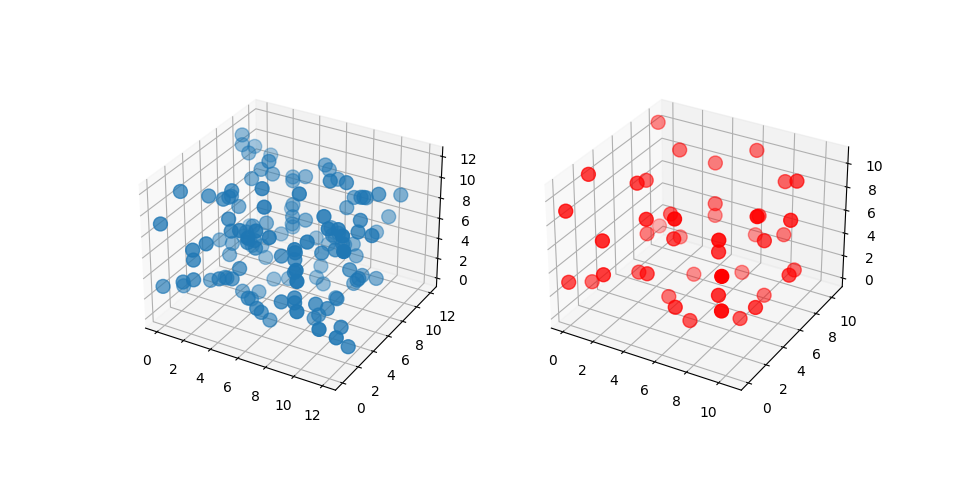

In [167]:
# Plot 3D atoms point clouds

fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# Plot all atoms
ax.scatter(df['x'], df['y'], df['z'],
           marker='o',
           s=100)
ax = fig.add_subplot(1, 2, 2, projection='3d')

# Plot oxgygens only 
ax.scatter(oxygen_df['x'], oxygen_df['y'], oxygen_df['z'],
            marker='o',
            s=100, 
            c='r')
plt.show()

In [432]:
# Use the x & y coords as the training data and z coords for y
# df_cols = ['x', 'y', 'z']
df_cols = ['z', 'y', 'x']
# df_cols = ['x', 'z', 'y']
X_cols = df_cols[:2]
y_col = [df_cols[2]]
# Convert to np array 
points = oxygen_df[df_cols] # All the columns used
np_points = np.array(points) # np array copy 
X_train = np.array(points[X_cols]) # x and y columns 
y_train = np.array(points[y_col]) # z column 


In [442]:
# Initialise RANSAC regressor for plane finding 
ransac = linear_model.RANSACRegressor(linear_model.LinearRegression(), 
                                      residual_threshold=0.0000001,
                                      stop_n_inliers = 5) # LOW THRESHOLD IS KEY (points very near the plane)

# Fit data
ransac.fit(X_train, y_train)
# Extract the coefficients of the plane equation (z = C1x + C2y + D)
C1 = ransac.estimator_.coef_[0][0]
C2 = ransac.estimator_.coef_[0][1]
D = ransac.estimator_.intercept_[0]

print("C1 = " + str(C1) + "\n" +
       "C2 = " + str(C2) + "\n" +
         "d = " + str(D))

# Store a mask of true/false data for each point corresponding to whether the point is an inlier of the plane or not
inlier_mask = ransac.inlier_mask_

C1 = -3.1986169792660258e-40
C2 = 9.740142858448556e-33
d = 6.014999866499999


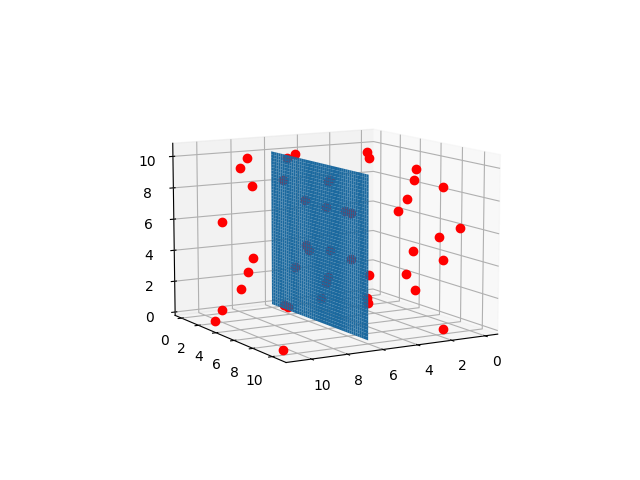

In [443]:
# The plane equation as a temporary function (visualisation purposes)
z = lambda x,y: C1*x + C2*y + D

# Make mesh of the fitted plane 
tmp = np.linspace(0,10,50)
x,y = np.meshgrid(tmp,tmp)

# Plot the plane mesh
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train[:,0], X_train[:,1], y_train[:, 0], 'or')
# ax.plot_surface(x, y, z(x,y))
ax.plot_surface(z(x,y), y, x)
# ax.plot_surface(x, z(x,y), y)
ax.view_init(10, 60)
plt.show()

In [444]:
# Find the inliers using the inlier mask function (i.e., the points on the plane)
inlier_points = np_points[inlier_mask]
inlier_points

array([[ 0.        ,  3.00605631,  6.01499987],
       [ 0.        ,  9.02394294,  6.01499987],
       [ 2.32082749,  1.42194593,  6.01499987],
       [ 2.32082749, 10.60805416,  6.01499987],
       [ 9.70917224,  1.42194593,  6.01499987],
       [ 9.70917224, 10.60805416,  6.01499987]])

In [445]:
 # Normal vector of the fitted plane
normal_vector = np.array([C1, C2, -1])
normal_vector /= np.linalg.norm(normal_vector)

# Find the orthogonal base vectors
e1 = np.cross(normal_vector, [1, 0, 0])
# Check it is nonzero
if np.linalg.norm(e1) == 0:
    e1 = np.cross(normal_vector, [0, 1, 0])

# Make e1 vectors unit vectors
e1 /= np.linalg.norm(e1)

# Calculate e2 and make unit vector
e2 = np.cross(normal_vector, e1)
e2 /= np.linalg.norm(e2)


In [446]:
# Point on the plane
point_on_plane = np.array([0, 0, D])

# Project points onto the plane
def project_point(point, point_on_plane, normal_vector):
    point_to_plane = point - point_on_plane
    distance_to_plane = np.dot(point_to_plane, normal_vector)
    projected_point = point - distance_to_plane * normal_vector
    return projected_point

# Project all points onto the plane using the funciton above
projected_points = np.array([project_point(p, point_on_plane, normal_vector) for p in inlier_points])

# Transform projected points to 2D coordinates
def to_2d_coordinates(point, point_on_plane, v1, v2):
    vector_from_plane = point - point_on_plane
    u = np.dot(vector_from_plane, v1)
    v = np.dot(vector_from_plane, v2)
    return np.array([u, v])

# Store the 2D coordinates of the inliers projected onto the plane in the e1 e2 coordinates
points_2d = np.array([to_2d_coordinates(p, point_on_plane, e1, e2) for p in projected_points])


In [447]:
points_2d

array([[-3.00605631e+00,  2.84094257e-55],
       [-9.02394294e+00,  2.84094257e-55],
       [-1.42194593e+00, -2.32082749e+00],
       [-1.06080542e+01, -2.32082749e+00],
       [-1.42194593e+00, -9.70917224e+00],
       [-1.06080542e+01, -9.70917224e+00]])

Text(0, 0.5, 'e2')

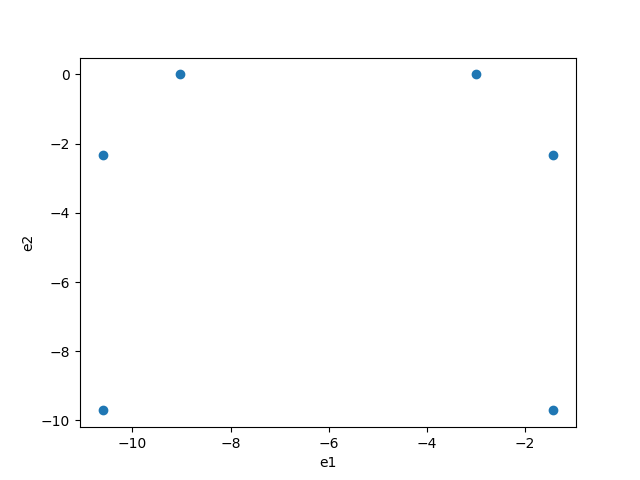

In [448]:
# Plot the points on the isolated plane
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(points_2d[:, 0], points_2d[:, 1],
           marker='o')
ax.set_xlabel("e1")
ax.set_ylabel("e2")

In [440]:
# Methods below are used to find hexagons on the fitted plane with the projected points
## WORK IN PROGRSS ##

In [441]:
def dist(P, Q):
    return np.sqrt((P[0]-Q[0])**2 + (P[1]-Q[1])**2)

In [356]:
def find_long_edge(S):
    n = len(S)
    longest_dist = 0
    longest_edge = []
    for i in range(len(S)):
        for j in range(i + 1, n - i):
            tmp_dist = abs(dist(S[i], S[j]))
            if tmp_dist > longest_dist:
                longest_edge = [S[i], S[j]]
                longest_dist = tmp_dist
    return longest_edge

In [16]:
def angle_calc(P, Q, R):
    # Calculate Angle Params
    PQ = Q - P
    PR = R - P
    theta = np.arccos(np.dot(PQ, PR)/(np.linalg.norm(PQ)*np.linalg.norm(PR)))
    return theta

In [17]:
def angle_calc_2(P, Q, R):
    # Calculate Angle Params
    PQ = Q - P
    RQ = Q - R
    theta = np.arccos(np.dot(PQ, RQ)/(np.linalg.norm(PQ)*np.linalg.norm(RQ)))
    return theta

In [18]:
def angle_calc_3(P, Q, R):
    # Calculate Angle Params
    RP = P - R
    RQ = Q - R
    theta = np.arccos(np.dot(RP, RQ)/(np.linalg.norm(RP)*np.linalg.norm(RQ)))
    return theta

In [19]:
# Find the hexagon using a 
P = points_2d[0]
Q = points_2d[1]
R = points_2d[3]
print(dist(P, Q))
print(dist(Q, R))
print("Ratio = " + str(dist(P, Q) / dist(Q, R)))

print(dist(P, Q))
print(dist(P, R))
print("Ratio = " + str(dist(P, Q) / dist(P, R)))

# print(angle_check(P, Q, R)*(180/np.pi))
# print(angle_check_2(P, Q, R)*(180/np.pi))
# print(angle_check_3(P, Q, R)*(180/np.pi))

8.895195626483156
7.503351686099999
Ratio = 1.18549629533713
8.895195626483156
11.637215807859919
Ratio = 0.764374896311129


In [20]:
find_long_edge(points_2d)

[array([-7.17221006, -2.26332426]), array([-16.06740569,  -9.76667594])]

In [66]:
def angle_check(P, Q, R, angle, angle_tol):
    PQ = Q - P
    PR = R - P
    theta = np.arccos(np.dot(PQ, PR)/(np.linalg.norm(PQ)*np.linalg.norm(PR)))
    return abs(theta - angle) < angle_tol

In [71]:
def is_hexagon(S):
    p0, p1 = find_long_edge(S)
    S = S.delete(p0)
    S = S.delete(p1)

    n = len(S)
    for i in range(n):
        if angle_check(p0, p1, S[i], 30*(np.pi/180), 0.01):
            p2 = S[i]
            continue

    return p0, p1, p2 

    
    


In [72]:
print(is_hexagon(points_2d))

AttributeError: 'numpy.ndarray' object has no attribute 'delete'